import pandas as pd

#載入資料集

df = pd.read_csv('./titanic/train.csv')

print(df.shape)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Step3. 資料前處理
在載入資料並大概了解了資料的情況後接著我們要來進行資料前處理，

設定 PassengerId 為 Index，將一些重要的遺漏值補齊（例如：Age）
和將資料從文字的名目資料轉為數值標籤（例如：Sex）。



In [7]:
#檢視 PassengerId 是否唯一值，若是則設為 index：
import numpy as np
print(np.unique(df['PassengerId'].values).size)


891


In [8]:
#將 PassengerId 設為 index：

df = df.set_index('PassengerId')

In [9]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#將性別的資料轉換,男性：0, 女性：1

df['SexCode'] = np.where(df['Sex']=='female',1,0)
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [16]:
df.isnull().sum()
#df['Age'].isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
SexCode       0
dtype: int64

In [19]:
#Age 有177筆空值 / Cabin 有687筆空值 / Embarked 有2筆空值
#將空值用平均數取代

avg_age = df['Age'].mean()
avg_age 

29.69911764705882

In [21]:
df['Age'] = df['Age'].fillna(avg_age)
df['Age'].isnull().sum()

0

In [22]:
#根據年齡性別統計
print(df.groupby('Sex')['Age'].size())
print(df.groupby('Sex')['Age'].mean())

Sex
female    314
male      577
Name: Age, dtype: int64
Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64


In [23]:
#女生314人 平均28歲 ／男生577人 平均30歲
#新增欄位 Died，比較存活和死亡狀況（將值設為 Survived 相反）

df['Died'] = np.where(df['Survived']==0, 1, 0)
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,Died
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


Step4. 探索式資料分析

探索式資料分析主要我們想要知道到底哪些欄位為重要的特徵值（Feature），我們可以使用圖表和統計相關性來進行分析，

這樣若未來我們要進行資料科學和機器學習專案建立模型時可以知道哪些是重要的特徵值（Feature）。

In [24]:
#使用圖表來呈現根據 Sex 群組的生存和死亡總數：

import matplotlib.pyplot as plt
df_groupby_Sex = df[['Survived', 'Died']].groupby(df['Sex']).sum()
print(df_groupby_Sex)


        Survived  Died
Sex                   
female       233    81
male         109   468


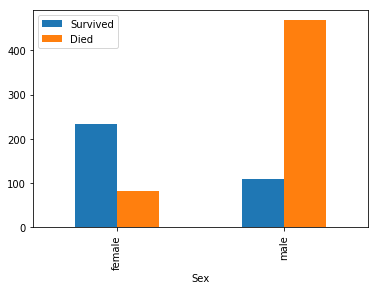

In [25]:
df_groupby_Sex.plot(kind='bar')
plt.show()

In [26]:
#使用圖表來呈現根據 Sex 群組的生存和死亡平均數：

df_groupby_Sex = df[['Survived', 'Died']].groupby(df['Sex']).mean()
print(df_groupby_Sex)


        Survived      Died
Sex                       
female  0.742038  0.257962
male    0.188908  0.811092


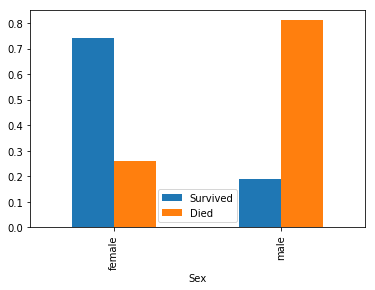

In [27]:
df_groupby_Sex.plot(kind='bar')
plt.show()

In [33]:
#使用圖表來呈現根據 Pclass 群組的生存和死亡總數：

df_group_by_pclass = df[['Survived', 'Died']].groupby(df['Pclass']).sum()
print(df_groupby_pclass)



        Survived  Died
Pclass                
1            136    80
2             87    97
3            119   372


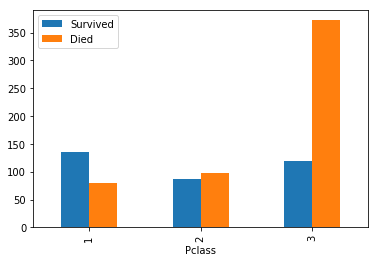

In [34]:
df_group_by_pclass.plot(kind='bar')
plt.show()

#第3級船艙的死亡人數最多

        Survived      Died
Pclass                    
1       0.629630  0.370370
2       0.472826  0.527174
3       0.242363  0.757637


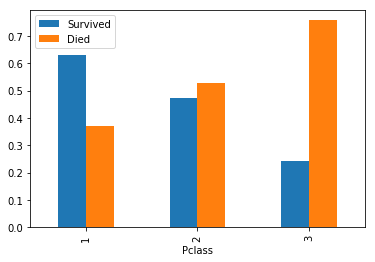

In [35]:
df_group_by_pclass = df[['Survived', 'Died']].groupby(df['Pclass']).mean()
print(df_group_by_pclass)
df_group_by_pclass.plot(kind='bar')
plt.show()

#平均而言，第1級船艙存活數最多

In [36]:
#使用 corr() 方法計算相關係數：

# 由於欄位較多，我們僅取出認為比較有可能會和 Survived 有關的屬性欄位
df[['Survived', 'Age', 'Pclass', 'Fare', 'SexCode']].corr()
# 一般研究者認為，相關係數絕對值 0.3 以下為低相關，0.3 ~ 0.7為中等相關，0.7 以上為高度相關

,Survived,Age,Pclass,Fare,SexCode
Survived,1.000000,-0.069809,-0.338481,0.257307,0.543351
Age,-0.069809,1.000000,-0.331339,0.091566,-0.084153
Pclass,-0.338481,-0.331339,1.000000,-0.549500,-0.131900
Fare,0.257307,0.091566,-0.549500,1.000000,0.182333
SexCode,0.543351,-0.084153,-0.131900,0.182333,1.000000


由於一般研究者認為相關係數取絕對值 0.3 以下為低相關，0.3 ~ 0.7為中等相關，0.7 以上為高度相關。

SexCode（女性可能較容易存活）0.543351，Pclass（票券級數數字越小是比較高級，所以相關係數為負數）

代表可能比較高級的票券乘客存活率比較高）都算是中度相關．Fare 則是票價屬於低度相關。Age 的相關性比較不明顯。

SexCode、Pclass 和 Fare 有可能是比較重要的特徵值（Feature）用來訓練機器學習模型（model）。

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 載入 sklearn 套件
from sklearn.linear_model import LinearRegression

# 使用 numpy array 建立資料集陣列
distances = np.array([3.5, 4.7, 0.6, 3.9, 0.8, 0.5])
prices = np.array([40, 34, 70, 39, 62, 55])

# 建立解釋變數 DataFrame
X = pd.DataFrame(distances, columns=['distances'])
# 建立反應變數 DataFrame 並取出欄位內容
y = pd.DataFrame(prices, columns=['prices'])['prices']

# 建立 LinearRegression 模型物件
linear_reg = LinearRegression()
# 使用 LinearRegression 模型物件方法 fit 訓練模型
linear_reg.fit(X, y)
# 建立新的距離 DataFrame
new_distances = pd.DataFrame(np.array([1.3, 4.2]))
# 使用模型預測新資料
predicted_prices = linear_reg.predict(new_distances)

print(predicted_prices)

[57.35110294 36.72058824]


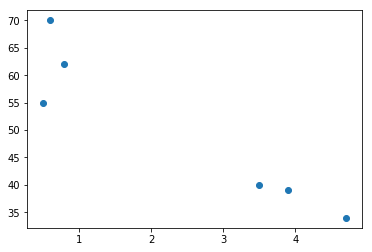

In [38]:
#可以看到距離 1.3 和 4.2 公里的房屋物件，價格分別為 57.35 和 36.72。
# 將資料集繪製散佈圖
plt.scatter(distances, prices)

#距離越近，價格越高

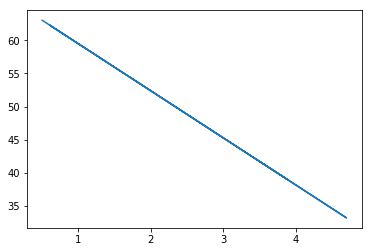

In [40]:
# 將所有距離資料使用模型進行預測
reg_prices = linear_reg.predict(X)
# 將原有資料預測結果繪製成圖
plt.plot(distances, reg_prices)

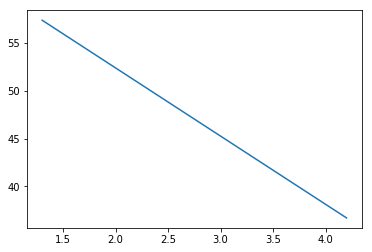

In [41]:
# 將新的資料預測結果繪製成圖
plt.plot(new_distances, predicted_prices)

plt.show()